# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 21s 0us/step


### 2. Visualize the First 24 Training Images

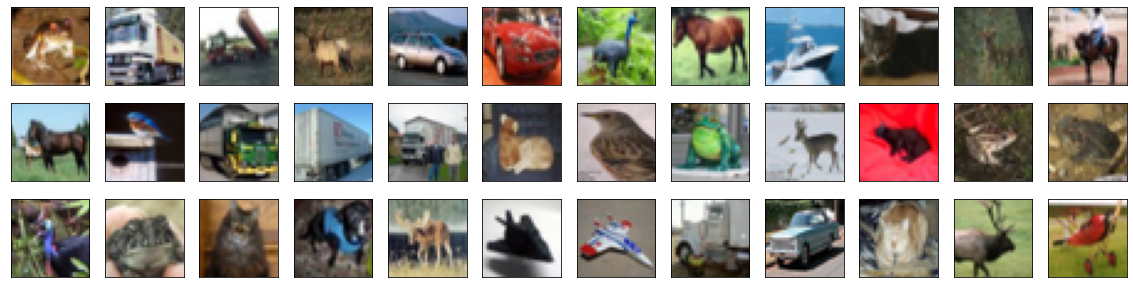

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 64)         

### 6. Compile the Model 

In [14]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 26s - loss: 1.5887 - accuracy: 0.4274 - val_loss: 1.3583 - val_accuracy: 0.5036

Epoch 00001: val_loss improved from inf to 1.35826, saving model to model.weights.best.hdf5
Epoch 2/100
 - 24s - loss: 1.2338 - accuracy: 0.5638 - val_loss: 1.3723 - val_accuracy: 0.5042

Epoch 00002: val_loss did not improve from 1.35826
Epoch 3/100
 - 26s - loss: 1.1083 - accuracy: 0.6104 - val_loss: 1.2093 - val_accuracy: 0.5734

Epoch 00003: val_loss improved from 1.35826 to 1.20933, saving model to model.weights.best.hdf5
Epoch 4/100
 - 26s - loss: 1.0483 - accuracy: 0.6339 - val_loss: 1.2325 - val_accuracy: 0.5942

Epoch 00004: val_loss did not improve from 1.20933
Epoch 5/100
 - 27s - loss: 1.0073 - accuracy: 0.6484 - val_loss: 0.9742 - val_accuracy: 0.6534

Epoch 00005: val_loss improved from 1.20933 to 0.97417, saving model to model.weights.best.hdf5
Epoch 6/100
 - 26s - loss: 0.9886 - accuracy: 0.6586 - val_loss: 0.9445 - val_accurac


Epoch 00054: val_loss did not improve from 0.89009
Epoch 55/100
 - 29s - loss: 1.5901 - accuracy: 0.4609 - val_loss: 1.3662 - val_accuracy: 0.5296

Epoch 00055: val_loss did not improve from 0.89009
Epoch 56/100
 - 37s - loss: 1.5818 - accuracy: 0.4594 - val_loss: 1.3465 - val_accuracy: 0.5368

Epoch 00056: val_loss did not improve from 0.89009
Epoch 57/100
 - 25s - loss: 1.5967 - accuracy: 0.4584 - val_loss: 1.4168 - val_accuracy: 0.4800

Epoch 00057: val_loss did not improve from 0.89009
Epoch 58/100
 - 29s - loss: 1.6036 - accuracy: 0.4571 - val_loss: 1.4395 - val_accuracy: 0.4964

Epoch 00058: val_loss did not improve from 0.89009
Epoch 59/100
 - 31s - loss: 1.6108 - accuracy: 0.4500 - val_loss: 1.2737 - val_accuracy: 0.5540

Epoch 00059: val_loss did not improve from 0.89009
Epoch 60/100
 - 31s - loss: 1.6196 - accuracy: 0.4472 - val_loss: 1.4883 - val_accuracy: 0.4964

Epoch 00060: val_loss did not improve from 0.89009
Epoch 61/100
 - 30s - loss: 1.6349 - accuracy: 0.4427 - val_

### 8. Load the Model with the Best Validation Accuracy

In [9]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6444000005722046


In [10]:
# new test in june2021
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6876999735832214


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

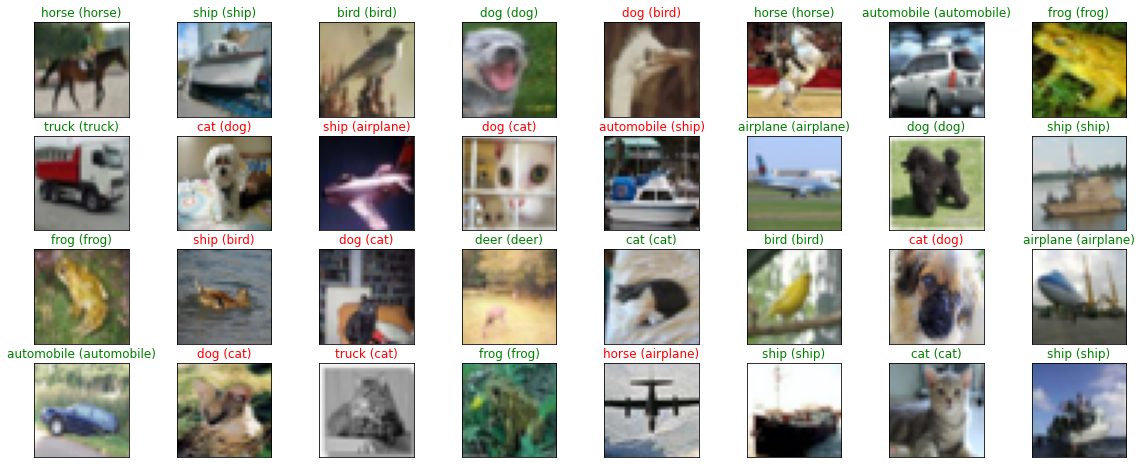

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### 11. Add Cutom Code from search in internet

This may give you some insight into why the network is misclassifying certain objects.

In [27]:
import sys
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2, hspace=None)
    plt.tight_layout()
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #pyplot.close()

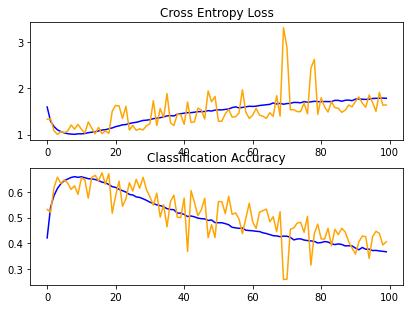

In [28]:
summarize_diagnostics(hist)

### 12. Create New model

In [33]:
# example of a 3-block vgg style architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)         

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

In [34]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [40]:
# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 19s - loss: 0.9588 - accuracy: 0.6722 - val_loss: 1.1486 - val_accuracy: 0.6348

Epoch 00001: val_loss improved from inf to 1.14863, saving model to model.weights.best.hdf5
Epoch 2/30
 - 18s - loss: 0.9617 - accuracy: 0.6761 - val_loss: 1.0957 - val_accuracy: 0.6590

Epoch 00002: val_loss improved from 1.14863 to 1.09573, saving model to model.weights.best.hdf5
Epoch 3/30
 - 18s - loss: 0.9601 - accuracy: 0.6834 - val_loss: 0.9879 - val_accuracy: 0.6662

Epoch 00003: val_loss improved from 1.09573 to 0.98792, saving model to model.weights.best.hdf5
Epoch 4/30
 - 18s - loss: 0.9738 - accuracy: 0.6751 - val_loss: 1.0373 - val_accuracy: 0.7046

Epoch 00004: val_loss did not improve from 0.98792
Epoch 5/30
 - 18s - loss: 0.9997 - accuracy: 0.6704 - val_loss: 0.8518 - val_accuracy: 0.7116

Epoch 00005: val_loss improved from 0.98792 to 0.85184, saving model to model.weights.best.hdf5
Epoch 6/30
 - 18s - loss: 0.9967 - accuracy: 

In [41]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [42]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.705299973487854


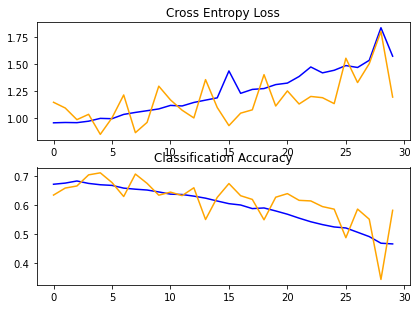

In [43]:
summarize_diagnostics(hist)